In [1]:
import zipfile
import os
import numpy as np
import json

In [2]:
import warnings
# Suppress specific warnings
warnings.filterwarnings('ignore')

In [3]:
# File path for the uploaded zip file
zip_file_path = 'test_1.zip'
         
# Extracting the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extracting to a directory
    extract_path = './extracted_logs'
    zip_ref.extractall(extract_path)

# Listing the contents of the extracted directory
extracted_files = os.listdir(extract_path)
extracted_files

['.DS_Store',
 '3M9IY_jv7u.json',
 '3M9IY_iej2.json',
 '3M9IY_tmod.json',
 '3M9IY_ehw8.json',
 '3M9IY_dfy7.json',
 '3M9IY_4z92.json',
 '3M9IY_u7bd.json',
 '3M9IY_wyvg.json',
 '3M9IY_87o0.json',
 '3M9IY_cf2e.json']

In [4]:
def mouse_movment_details(json_file_path):  
    with open(json_file_path, 'r') as file:
        json_data = json.load(file)
    
    event_data = json_data['eventData']
    mousemove_events = [event for event in event_data if event['eventType'] == 'mousemove']
    # Calculating distances and time differences between consecutive mousemove events
    distances = []
    time_differences = []
    for i in range(1, len(mousemove_events)):
        # Previous and current event
        prev_event = mousemove_events[i - 1]
        curr_event = mousemove_events[i]
        # Calculating distance using Pythagorean theorem
        distance = np.sqrt((curr_event['details']['x'] - prev_event['details']['x'])**2 + 
                           (curr_event['details']['y'] - prev_event['details']['y'])**2)
        distances.append(distance)
        # Calculating time difference in seconds
        time_diff = np.datetime64(curr_event['timestamp']) - np.datetime64(prev_event['timestamp'])
        time_diff_seconds = time_diff.item().total_seconds()
        time_differences.append(time_diff_seconds)
    # Calculating average distance and velocity
    total_distance = np.sum(distances) if distances else 0
    average_velocity = np.mean([d/t if t != 0 else 0 for d, t in zip(distances, time_differences)]) if time_differences else 0
    return total_distance, average_velocity

In [5]:
def scroll_movement_details(json_file_path):
    """
    Analyzes scroll events from a JSON file containing event data.

    Args:
    json_file_path (str): The file path of the JSON file containing the event data.

    Returns:
    tuple: A tuple containing the total scroll distance and average scroll velocity.
    """
    # Load JSON data
    with open(json_file_path, 'r') as file:
        json_data = json.load(file)

    event_data = json_data['eventData']

    # Filtering only scroll events
    scroll_events = [event for event in event_data if event['eventType'] == 'scroll']

    # Calculating scroll distances and time differences between consecutive scroll events
    scroll_distances = []
    scroll_time_differences = []

    for i in range(1, len(scroll_events)):
        # Previous and current event
        prev_event = scroll_events[i - 1]
        curr_event = scroll_events[i]

        # Calculating scroll distance (difference in scroll position)
        scroll_distance = abs(curr_event['details']['scrollTop'] - prev_event['details']['scrollTop'])
        scroll_distances.append(scroll_distance)

        # Calculating time difference in seconds
        time_diff = np.datetime64(curr_event['timestamp']) - np.datetime64(prev_event['timestamp'])
        time_diff_seconds = time_diff.item().total_seconds()
        scroll_time_differences.append(time_diff_seconds)

    # Calculating total scroll distance and average scroll velocity
    total_scroll_distance = np.sum(scroll_distances) if scroll_distances else 0
    average_scroll_velocity = np.mean([d/t if t != 0 else 0 for d, t in zip(scroll_distances, scroll_time_differences)]) if scroll_time_differences else 0

    return total_scroll_distance, average_scroll_velocity

In [6]:
import os
import json
import numpy as np

# Include your mouse_movment_details and scroll_movement_details functions here

def process_all_json_files(directory_path):
    summary_data = []
    
    # Filter out non-JSON files and sort to ensure a consistent order
    json_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.json')])

    # Process each JSON file
    for json_file in json_files:
        file_path = os.path.join(directory_path, json_file)
        try:
            with open(file_path, 'r') as file:
                json_data = json.load(file)

            # Extract global start, session start, and end times
            global_start_time = np.datetime64(json_data['global_start_time'])
            session_start_time = np.datetime64(json_data['session_start_time'])
            end_time = np.datetime64(json_data['end_time'])

            # Calculate experiment and task durations
            experiment_duration = (end_time - global_start_time).item().total_seconds()
            task_duration = (end_time - session_start_time).item().total_seconds()

            # Calculate mouse movement and scroll details
            mouse_distance, mouse_velocity = mouse_movment_details(file_path)
            scroll_distance, scroll_velocity = scroll_movement_details(file_path)

            # Append the data to the summary list
            summary_data.append({
                'file': json_file,
                'experiment_duration': experiment_duration,
                'task_duration': task_duration,
                'mouse_total_distance': mouse_distance,
                'mouse_average_velocity': mouse_velocity,
                'scroll_total_distance': scroll_distance,
                'scroll_average_velocity': scroll_velocity
            })
        except Exception as e:
            print(f"Error processing {json_file}: {e}")

    return summary_data

# Directory containing the extracted JSON files
directory_path = './extracted_logs'

# Process the files and get the summary
summary_data = process_all_json_files(directory_path)
print(summary_data)

[{'file': '3M9IY_4z92.json', 'experiment_duration': 33.381, 'task_duration': 33.381, 'mouse_total_distance': 6941.355153043716, 'mouse_average_velocity': 279.5992024837847, 'scroll_total_distance': 3305.45452606678, 'scroll_average_velocity': 923.047569042404}, {'file': '3M9IY_87o0.json', 'experiment_duration': 40.874, 'task_duration': 40.874, 'mouse_total_distance': 1795.4756731905586, 'mouse_average_velocity': 186.379142083406, 'scroll_total_distance': 2463.636365056038, 'scroll_average_velocity': 994.5980935789177}, {'file': '3M9IY_cf2e.json', 'experiment_duration': 37.398, 'task_duration': 37.398, 'mouse_total_distance': 2598.4674754014663, 'mouse_average_velocity': 174.54094974340768, 'scroll_total_distance': 400.90908539295197, 'scroll_average_velocity': 970.1164297352381}, {'file': '3M9IY_dfy7.json', 'experiment_duration': 13.921, 'task_duration': 13.921, 'mouse_total_distance': 780.1164124036832, 'mouse_average_velocity': 131.05186548979748, 'scroll_total_distance': 522.7272616

In [7]:
import numpy as np

# Assuming 'summary_data' is the list of dictionaries returned by the 'process_all_json_files' function

# Initialize variables for aggregation
total_experiment_time = 0
total_task_time = 0
total_mouse_distance = 0
total_scroll_distance = 0
total_mouse_speed = 0
total_scroll_speed = 0

# Loop through each summary and aggregate the data
for data in summary_data:
    total_experiment_time += data['experiment_duration']
    total_task_time += data['task_duration']
    total_mouse_distance += data['mouse_total_distance']
    total_scroll_distance += data['scroll_total_distance']
    total_mouse_speed += data['mouse_average_velocity']
    total_scroll_speed += data['scroll_average_velocity']

# Calculate averages
average_experiment_time = total_experiment_time / len(summary_data)
average_task_time = total_task_time / len(summary_data)
average_mouse_distance = total_mouse_distance / len(summary_data)
average_scroll_distance = total_scroll_distance / len(summary_data)
average_mouse_speed = total_mouse_speed / len(summary_data)
average_scroll_speed = total_scroll_speed / len(summary_data)

# Create the table of statistics
stats_table = {
    'Total Experiment Time (s)': total_experiment_time,
    'Average Experiment Time (s)': average_experiment_time,
    'Total Task Time (s)': total_task_time,
    'Average Task Time (s)': average_task_time,
    'Total Mouse Movement Distance (units)': total_mouse_distance,
    'Average Mouse Movement Distance (units)': average_mouse_distance,
    'Average Mouse Speed (units/s)': average_mouse_speed,
    'Average Scroll Speed (units/s)': average_scroll_speed
}

# Print the table or convert it to a DataFrame for nicer formatting
# Here's how you could print it directly
for key, value in stats_table.items():
    print(f"{key}: {value:.2f}")


Total Experiment Time (s): 265.30
Average Experiment Time (s): 26.53
Total Task Time (s): 265.30
Average Task Time (s): 26.53
Total Mouse Movement Distance (units): 24195.87
Average Mouse Movement Distance (units): 2419.59
Average Mouse Speed (units/s): 184.80
Average Scroll Speed (units/s): 1003.31


In [8]:
#Sample json file
json_file_path = "extracted_logs/3M9IY_87o0.json"

with open(json_file_path, 'r') as file:
    json_data = json.load(file)

# Displaying the structure and some contents of the JSON file for an overview
sample_json_content = {key: json_data[key] for key in list(json_data.keys())[:]}  # showing a snippet for overview
structure_overview_keys = list(json_data.keys())

structure_overview_keys

['hit_id',
 'user_id',
 'global_start_time',
 'session_start_time',
 'end_time',
 'code',
 'logging_type',
 'hit_setting',
 'finish_status',
 'eventData']

In [9]:
mouse_movment_details(json_file_path)

(1795.4756731905586, 186.379142083406)

In [10]:
scroll_movement_details(json_file_path)

(2463.636365056038, 994.5980935789177)

In [11]:
def process_user_logs(extract_path):
    """
    Processes all user log JSON files in the given directory and compiles the results.

    Args:
    extract_path (str): The directory path containing the extracted JSON files.

    Returns:
    dict: A dictionary containing the compiled results for all users.
    """

    results = {}

    for file in os.listdir(extract_path):
        if not file.endswith('.json'):
            continue  # Skip non-JSON files

        file_path = os.path.join(extract_path, file)

        try:
            with open(file_path, 'r', encoding='utf-8') as json_file:
                data = json.load(json_file)

            user_data = {key: data.get(key, None) for key in [
                'hit_id', 'user_id', 'global_start_time', 'session_start_time',
                'end_time', 'code', 'logging_type', 'hit_setting', 'finish_status'
            ]}

            # Add mouse movement details
            total_mouse_distance, avg_mouse_velocity = mouse_movment_details(file_path)
            user_data['total_mouse_distance'] = total_mouse_distance
            user_data['avg_mouse_velocity'] = avg_mouse_velocity

            # Add scroll movement details
            total_scroll_distance, avg_scroll_velocity = scroll_movement_details(file_path)
            user_data['total_scroll_distance'] = total_scroll_distance
            user_data['avg_scroll_velocity'] = avg_scroll_velocity

            results[file] = user_data

        except Exception as e:
            results[file] = {'error': str(e)}

    return results

In [12]:
info = process_user_logs(extract_path)

In [13]:
# Attempting to load the sample JSON file again
file_path = 'sample.json'

try:
    with open(file_path, 'r') as file:
        sample_json_data = json.load(file)
    sample_keys = list(sample_json_data.keys())
    sample_snippet = {key: sample_json_data[key] for key in sample_keys[:5]}
except Exception as e:
    sample_keys, sample_snippet, str(e)

In [14]:
sample_keys

['3M9IY_jv7u.json',
 '3M9IY_iej2.json',
 '3M9IY_tmod.json',
 '3M9IY_ehw8.json',
 '3M9IY_dfy7.json',
 '3M9IY_4z92.json',
 '3M9IY_u7bd.json',
 '3M9IY_wyvg.json',
 '3M9IY_87o0.json',
 '3M9IY_cf2e.json']

In [15]:
sample_snippet

{'3M9IY_jv7u.json': {'hit_id': '3M9IY',
  'user_id': 'jv7u',
  'global_start_time': '2024-01-08T03:22:53.949Z',
  'session_start_time': '2024-01-08T03:22:53.949Z',
  'end_time': '2024-01-08T03:23:08.882Z',
  'code': 'D0DM',
  'logging_type': 1,
  'hit_setting': {'slidesToShow': '5',
   'slidesToScroll': '1',
   'arrows': 'true',
   'dots': 'false',
   'infinite': 'true',
   'centerMode': 'false',
   'draggable': 'false',
   'optVisual': 'social',
   'optTitle': 'true'},
  'finish_status': 1,
  'total_mouse_distance': 2958.5531394045083,
  'avg_mouse_velocity': 293.33922792455155,
  'total_scroll_distance': 559.0909091234207,
  'avg_scroll_velocity': 823.7406002551727},
 '3M9IY_iej2.json': {'hit_id': '3M9IY',
  'user_id': 'iej2',
  'global_start_time': '2024-01-08T01:01:38.511Z',
  'session_start_time': '2024-01-08T01:01:38.511Z',
  'end_time': '2024-01-08T01:02:25.803Z',
  'code': 'IWZ3',
  'logging_type': 1,
  'hit_setting': {'slidesToShow': '5',
   'slidesToScroll': '1',
   'arrows':

In [25]:
import os
import json
import pandas as pd
import numpy as np

# Function to read data from a single JSON file and return it as a dictionary
def read_json_data(file_path):
    with open(file_path, 'r') as file:
        json_data = json.load(file)
    return json_data

# Function to process all JSON files and add their data into a DataFrame
def process_all_json_files_to_df(directory_path):
    all_data = []

    # Filter out non-JSON files
    json_files = [file for file in os.listdir(directory_path) if file.endswith('.json')]

    # Process each JSON file
    for json_file in json_files:
        file_path = os.path.join(directory_path, json_file)
        try:
            json_data = read_json_data(file_path)

            # Extract relevant data and append to the list
            mouse_distance, mouse_velocity = mouse_movment_details(file_path)
            scroll_distance, scroll_velocity = scroll_movement_details(file_path)
            #experiment_duration = json_data['experiment_duration']
            global_start_time = np.datetime64(json_data['global_start_time'])
            session_start_time = np.datetime64(json_data['session_start_time'])
            end_time = np.datetime64(json_data['end_time'])
            
            event_data = json_data['eventData']

            # Filtering only scroll events
            scroll_events = [event for event in event_data if event['eventType'] == 'scroll']
            mouse_events = [event for event in event_data if event['eventType'] == 'mousemove']
            click_events = [event for event in event_data if event['eventType'] == 'click']

    

            # Calculate experiment and task durations
            experiment_duration = (end_time - global_start_time).item().total_seconds()
            

            all_data.append({
                'file': json_file,
                'experiment_duration': experiment_duration,
                'mouse_total_distance': mouse_distance,
                'mouse_average_velocity': mouse_velocity,
                'scroll_total_distance': scroll_distance,
                'scroll_average_velocity': scroll_velocity,
                'total_scroll_movment': len(scroll_events),
                'total_mouse_movment': len(mouse_events),
                'total_click': len(click_events)
            })
        except Exception as e:
            print(f"Error processing {json_file}: {e}")

    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(all_data)

# Process the files and get the DataFrame
directory_path = './extracted_logs'
df = process_all_json_files_to_df(directory_path)

# Calculate various statistics
stats = {
    'Sum Experiment Time (s)': df['experiment_duration'].sum(),
    'Mean Experiment Time (s)': df['experiment_duration'].mean(),
    'Median Experiment Time (s)': df['experiment_duration'].median(),
    'Experiment Time SD (s)': df['experiment_duration'].std(),
    
    'Sum Mouse Movement Distance (units)': df['mouse_total_distance'].sum(),
    'Mean Mouse Movement Distance (units)': df['mouse_total_distance'].mean(),
    'Median Mouse Movement Distance (units)': df['mouse_total_distance'].median(),
    'Mouse Movement Distance SD (units)': df['mouse_total_distance'].std(),
    
    'Sum Mouse Speed (units/s)': df['mouse_average_velocity'].sum(),    
    'Mean Mouse Speed (units/s)': df['mouse_average_velocity'].mean(),
    'Median Mouse Speed (units/s)': df['mouse_average_velocity'].median(),
    'Mouse Speed SD (units/s)': df['mouse_average_velocity'].std(),
    
    'All Scroll Movment Event': df['total_scroll_movment'].sum(),
    'Mean Scroll Movment Event': df['total_scroll_movment'].mean(),
    'Median Scroll Movment Event': df['total_scroll_movment'].median(),
    'Mouse Scroll Movment Event': df['total_scroll_movment'].std(),
    
    'All Mouse Movment Event': df['total_mouse_movment'].sum(),
    'Mean Mouse Movment Event': df['total_mouse_movment'].mean(),
    'Median Mouse Movment Event': df['total_mouse_movment'].median(),
    'Mouse Mouse Movment Event': df['total_mouse_movment'].std(),
    
    'All Click Event': df['total_click'].sum(),
    'Mean Click Event': df['total_click'].mean(),
    'Median Click Event': df['total_click'].median(),
    'Mouse Click Event': df['total_click'].std()
    
    
    
    
    # Add similar calculations for scroll data
}

# Print the statistics
for key, value in stats.items():
    print(f"{key}: {value:.2f}")

Sum Experiment Time (s): 265.30
Mean Experiment Time (s): 26.53
Median Experiment Time (s): 23.21
Experiment Time SD (s): 12.31
Sum Mouse Movement Distance (units): 24195.87
Mean Mouse Movement Distance (units): 2419.59
Median Mouse Movement Distance (units): 2002.20
Mouse Movement Distance SD (units): 1702.58
Sum Mouse Speed (units/s): 1848.02
Mean Mouse Speed (units/s): 184.80
Median Mouse Speed (units/s): 176.92
Mouse Speed SD (units/s): 93.57
All Scroll Movment Event: 854.00
Mean Scroll Movment Event: 85.40
Median Scroll Movment Event: 62.00
Mouse Scroll Movment Event: 63.64
All Mouse Movment Event: 48.00
Mean Mouse Movment Event: 4.80
Median Mouse Movment Event: 4.00
Mouse Mouse Movment Event: 2.15
All Click Event: 105.00
Mean Click Event: 10.50
Median Click Event: 9.50
Mouse Click Event: 4.01


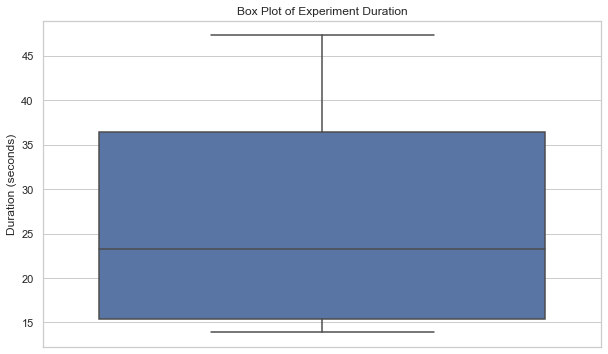

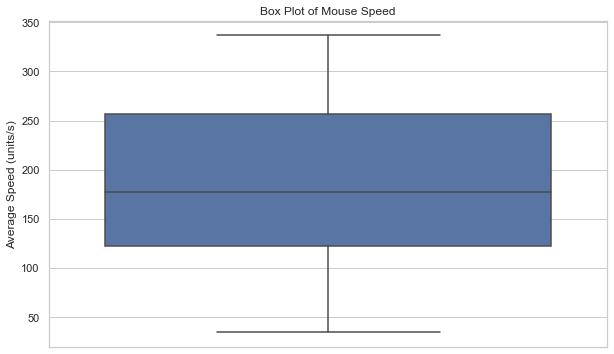

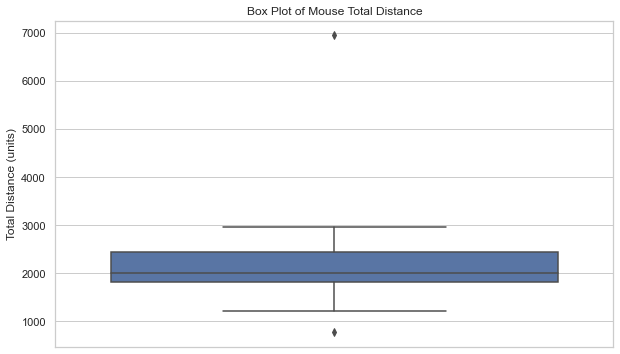

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Box plot for experiment duration
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['experiment_duration'])
plt.title('Box Plot of Experiment Duration')
plt.ylabel('Duration (seconds)')
plt.show()

# Box plot for mouse speed
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['mouse_average_velocity'])
plt.title('Box Plot of Mouse Speed')
plt.ylabel('Average Speed (units/s)')
plt.show()

# Box plot for mouse distance
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['mouse_total_distance'])
plt.title('Box Plot of Mouse Total Distance')
plt.ylabel('Total Distance (units)')
plt.show()

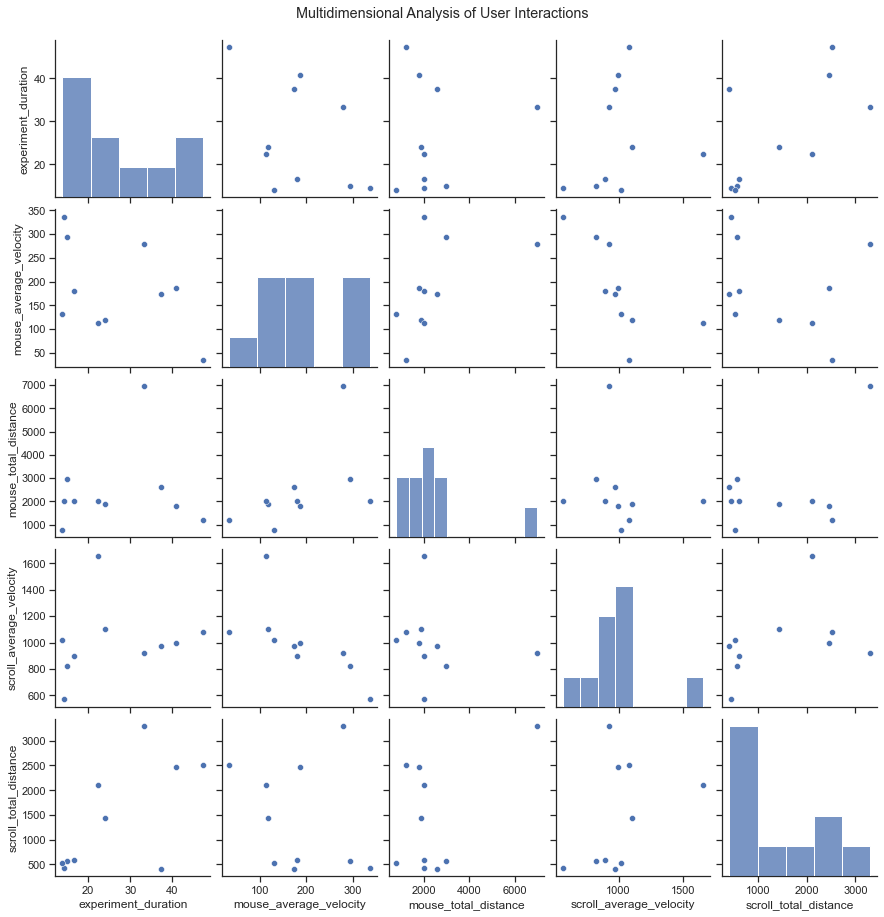

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="ticks", color_codes=True)

# Select columns for the pairplot
columns_to_plot = ['experiment_duration', 'mouse_average_velocity', 'mouse_total_distance', 'scroll_average_velocity', 'scroll_total_distance']

# Create a pairplot
sns.pairplot(df[columns_to_plot])
plt.suptitle('Multidimensional Analysis of User Interactions', y=1.02)
plt.show()